In [ ]:
import numpy as np
import pandas as pd
import os
import glob
from analysis_helper import *
from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

x = cdf.drop_duplicates(['hs_id', 'rf_id'])
x = x[x['max_iter'] < 49][['hs_id', 'rf_id', 'max_iter']]

with open('./exp2_n2.dag') as f:
    content = f.readlines()
    
keep = []

job_fmt = 'HS_{}_BATCH_0_START_{}'
for i, row in x.iterrows():
    hs_id = row['hs_id']
    rf_id = row['rf_id']
    jname = job_fmt.format(hs_id, rf_id)
    
    for line in content:
        if jname in line:
            keep.append(line)

with open('./exp2_n3.dag', 'w') as f:
    f.writelines(keep)

In [2]:
import numpy as np
import pandas as pd
import os
import glob
from analysis_helper import *
from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

iter_max=10
task_col='pcba-aid624173'
cluster_col='BT_0.4 ID'

run_threshold=0
hs_params, benchmark_params, custom_params = 12, 6, 3
hs_job_count = hs_params*1
benchmark_job_count = benchmark_params*1
custom_job_count = custom_params*1

root_dir = '../../../aldd_results/params_results_exp_2\\'
hs_dir = glob.glob(root_dir+'sampled_hyparams/*/*/*/')
custom_dir = glob.glob(root_dir+'custom_cbws/*/*/*/')
benchmark_dir = glob.glob(root_dir+'benchmarks/*/*/*/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
all_96_hs, all_384_hs, all_1536_hs, all_df_hs, successful_jobs, failed_jobs = get_results(hs_dir, iter_max, task_col, cluster_col, run_threshold, False, False)

print('----------------------------------------------------------------------------')
print('HS Jobs:')
print('Total jobs: {}'.format(hs_job_count))
print('Failed jobs: {}'.format(len(failed_jobs)))
print('Successful jobs: {}'.format(len(successful_jobs)))

hs_unique = np.unique(["_".join(x.split('_')[0:2]) for x in successful_jobs])
print('Total HS: {}'.format(hs_params))
print('Successful HS: {}'.format(len(hs_unique)))

119/120
----------------------------------------------------------------------------
HS Jobs:
Total jobs: 12
Failed jobs: 0
Successful jobs: 120
Total HS: 12
Successful HS: 12


In [4]:
all_96_bm, all_384_bm, all_1536_bm, all_df_bm, successful_jobs, failed_jobs = get_results(benchmark_dir, iter_max, task_col, cluster_col, run_threshold, False, False)

print('----------------------------------------------------------------------------')
print('Benchmark Jobs:')
print('Total jobs: {}'.format(benchmark_job_count))
print('Failed jobs: {}'.format(len(failed_jobs)))
print('Successful jobs: {}'.format(len(successful_jobs)))

hs_unique = np.unique(["_".join(x.split('_')[0:2]) for x in successful_jobs])
print('Total HS: {}'.format(benchmark_params))
print('Successful HS: {}'.format(len(hs_unique)))

50/51
----------------------------------------------------------------------------
Benchmark Jobs:
Total jobs: 6
Failed jobs: 1
Successful jobs: 50
Total HS: 6
Successful HS: 5


In [5]:
all_96_cs, all_384_cs, all_1536_cs, all_df_cs, successful_jobs, failed_jobs = get_results(custom_dir, iter_max, task_col, cluster_col, run_threshold, False, False)

print('----------------------------------------------------------------------------')
print('Custom Jobs:')
print('Total jobs: {}'.format(custom_job_count))
print('Failed jobs: {}'.format(len(failed_jobs)))
print('Successful jobs: {}'.format(len(successful_jobs)))

hs_unique = np.unique(["_".join(x.split('_')[0:3]) for x in successful_jobs])
print('Total HS: {}'.format(custom_params))
print('Successful HS: {}'.format(len(hs_unique)))

29/30
----------------------------------------------------------------------------
Custom Jobs:
Total jobs: 3
Failed jobs: 0
Successful jobs: 30
Total HS: 3
Successful HS: 3


In [6]:
des_cols = ['hs_id', 'max_iter', 'exploitation_hits', 'exploration_hits', 'total_hits',
            'total_unique_hits', 'total_batch_size', 'hs_group', 'rf_id']
cdf = pd.concat([all_96_hs, all_96_bm, all_96_cs])
sdf1 = cdf[cdf['iter_num']==9999][des_cols]
sdf1 = sdf1.groupby('hs_id').mean().sort_values('total_hits', ascending=False)
sorted_hid_list = sdf1.index.tolist()
sdf2 = cdf[cdf['iter_num']==9999][des_cols]
sdf2 = sdf2.groupby('hs_id').std().loc[sorted_hid_list]

sdf2 = sdf2[[c for c in sdf2.columns if '_hits' in c]]
sdf2.columns = [c.replace('hits', 'std') for c in sdf2.columns]

sdf = pd.concat([sdf1, sdf2], axis=1)
sdf

,max_iter,exploitation_hits,exploration_hits,total_hits,total_unique_hits,total_batch_size,exploitation_std,exploration_std,total_std,total_unique_std
hs_id,,,,,,,,,,
ClusterBasedWCSelector_custom_1,48.0,140.8,113.3,254.1,254.1,4704.0,9.589346,8.602971,13.617391,13.617391
ClusterBasedWCSelector_609,49.0,0.0,254.0,254.0,254.0,4800.0,0.000000,8.299933,8.299933,8.299933
ClusterBasedWCSelector_411,49.0,0.0,254.0,254.0,254.0,4800.0,0.000000,8.299933,8.299933,8.299933
ClusterBasedWCSelector_341,49.0,21.8,226.5,248.3,210.5,4800.0,5.788878,14.676133,13.474668,9.766724
MABSelector_2,49.0,244.3,0.0,244.3,174.3,4800.0,19.061596,0.000000,19.061596,10.456789
ClusterBasedWCSelector_368,49.0,63.0,176.1,239.1,204.5,4800.0,9.368980,16.244315,18.162538,13.057565
MABSelector_exploitive,49.0,231.2,0.0,231.2,168.4,4800.0,22.933721,0.000000,22.933721,14.135849
ClusterBasedWCSelector_678,44.0,0.0,229.8,229.8,229.8,4320.0,0.000000,19.060139,19.060139,19.060139
ClusterBasedWCSelector_201,49.0,5.5,223.9,229.4,203.5,4800.0,3.597839,22.198348,20.391719,18.512758


## Plot exploit-explore hit progress

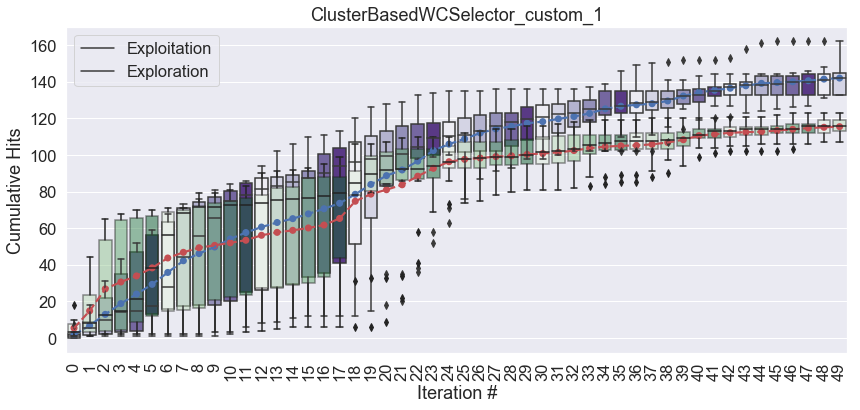

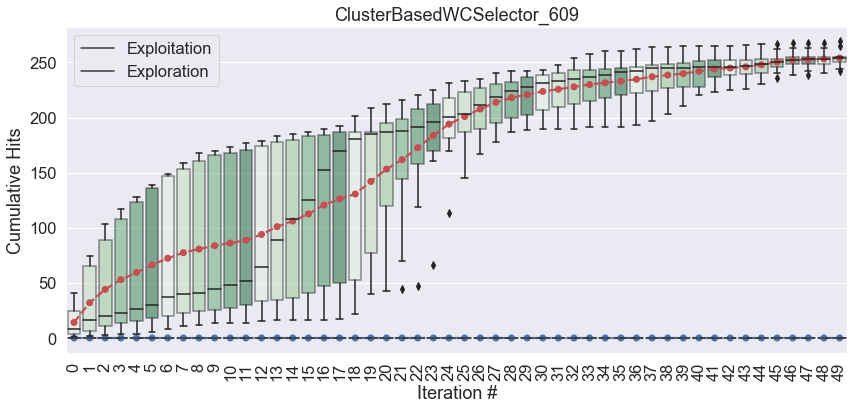

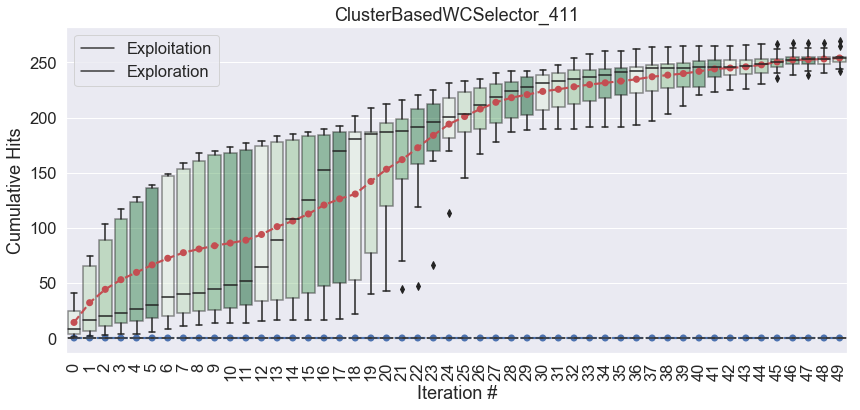

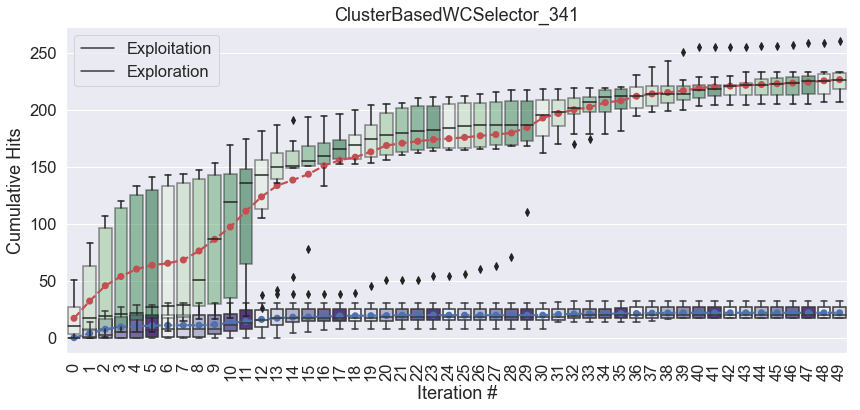

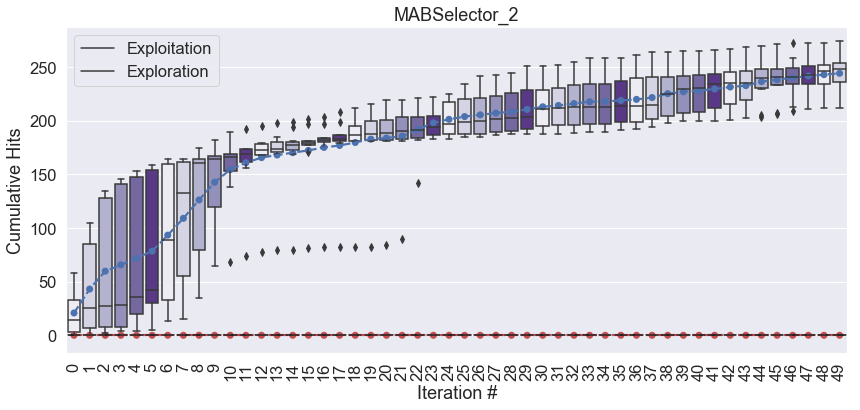

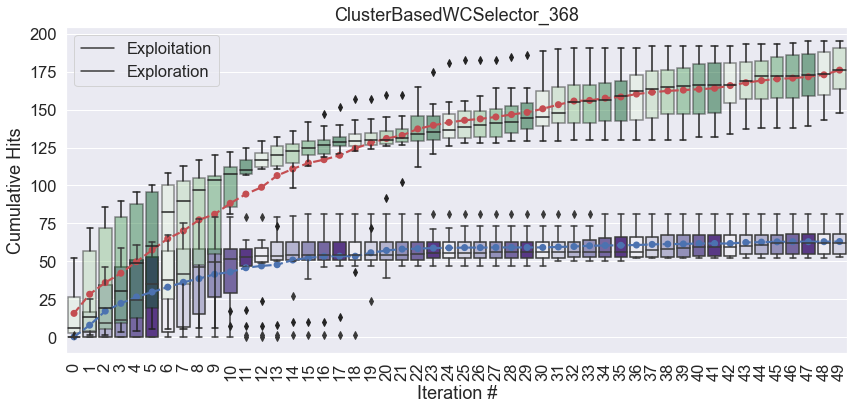

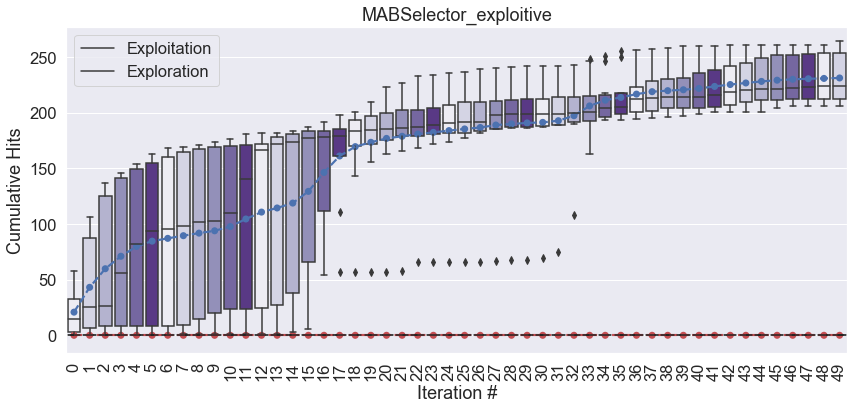

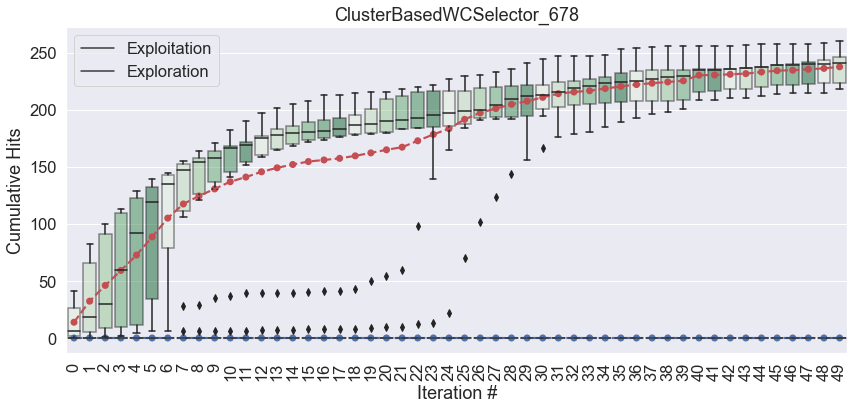

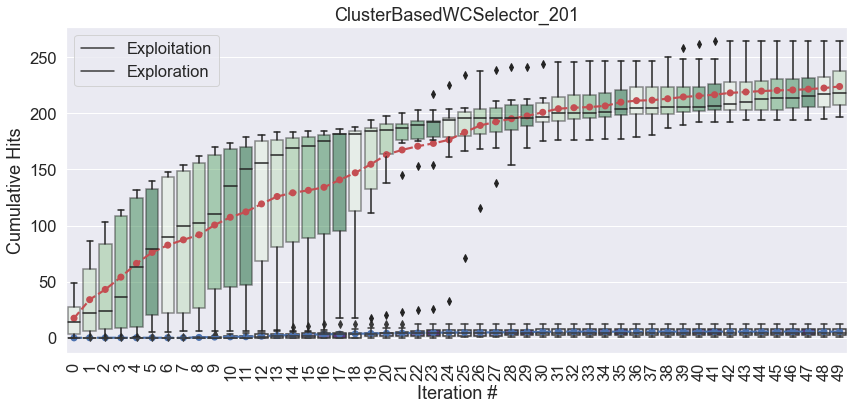

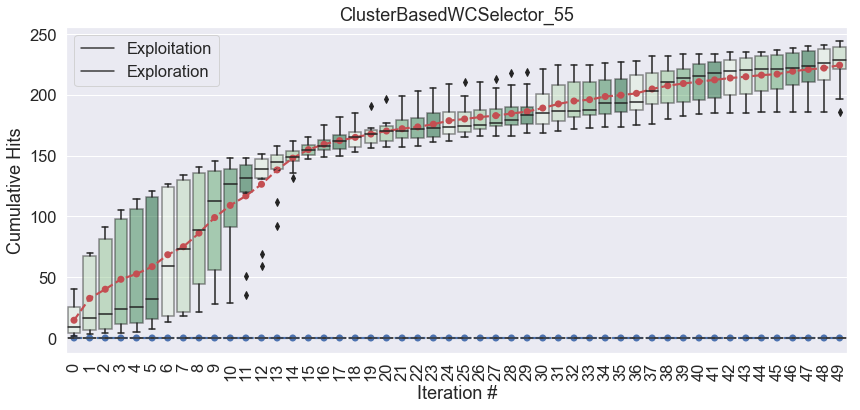

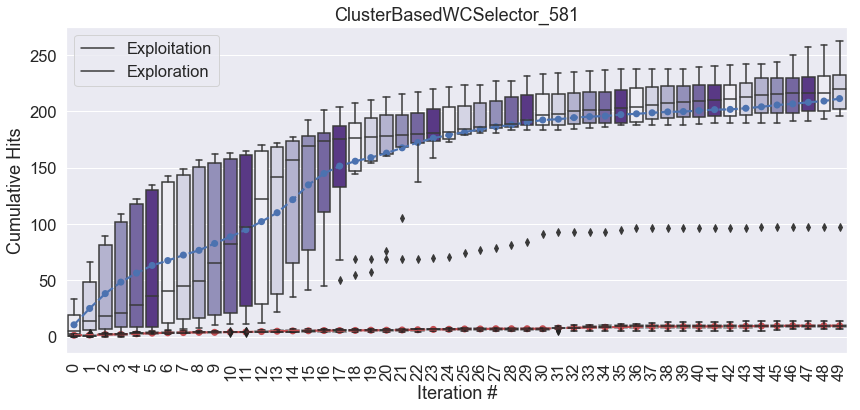

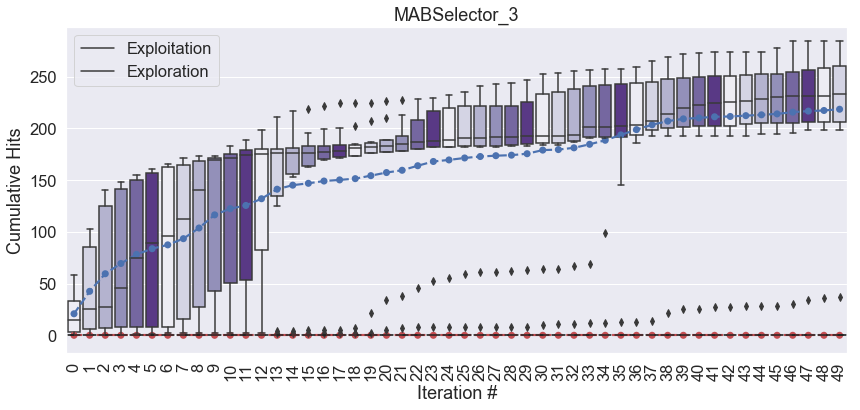

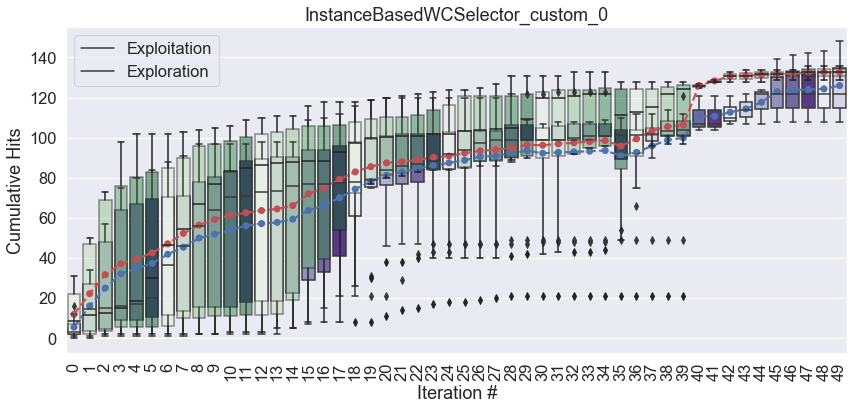

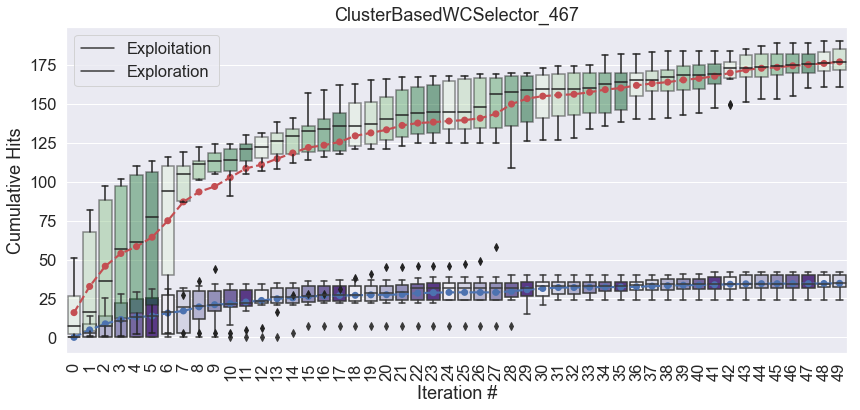

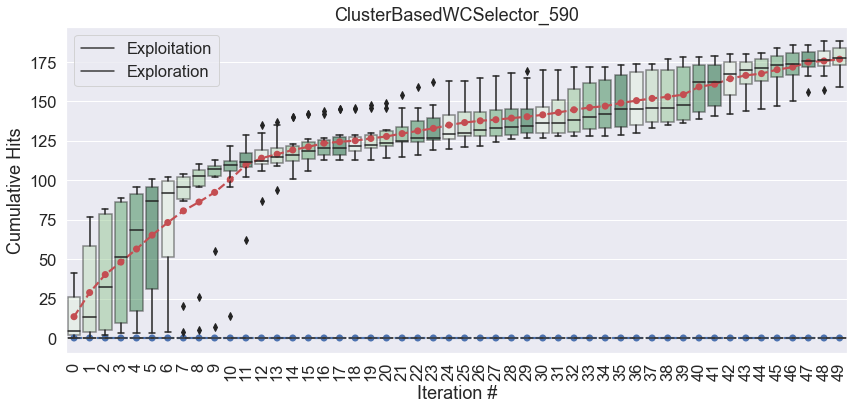

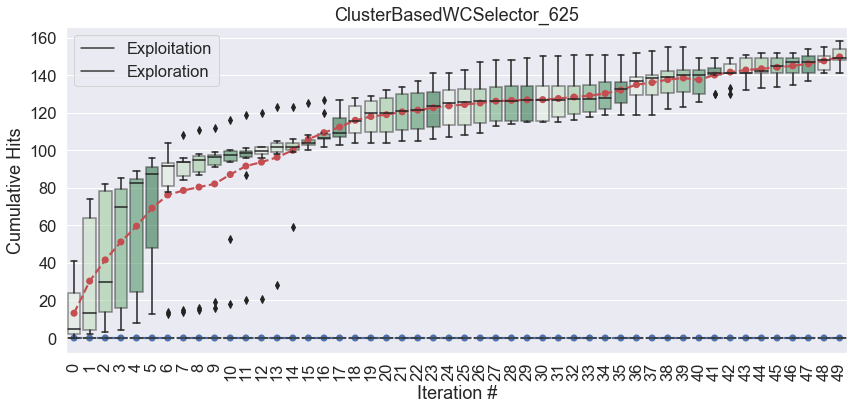

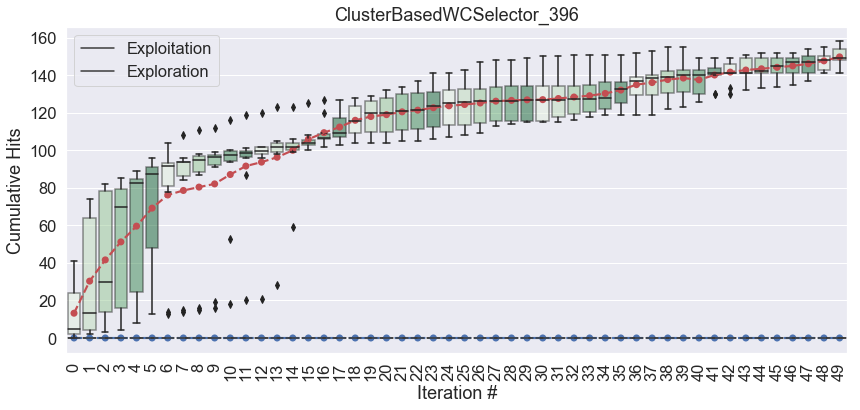

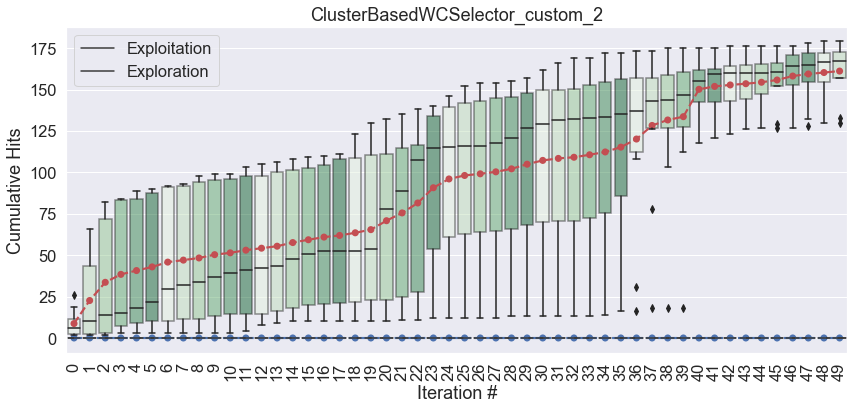

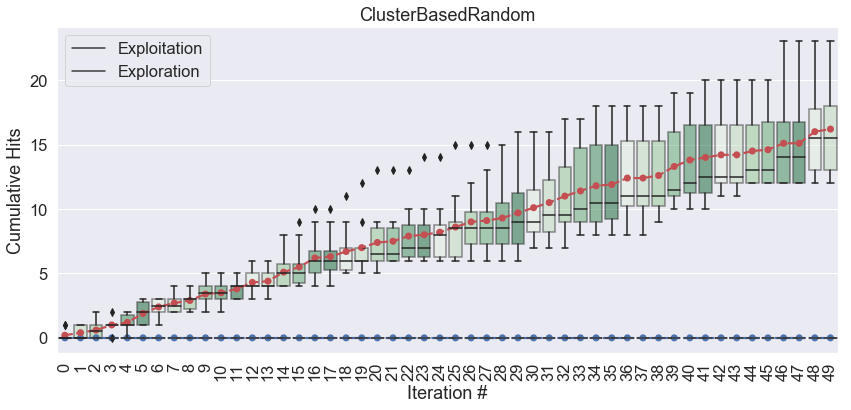

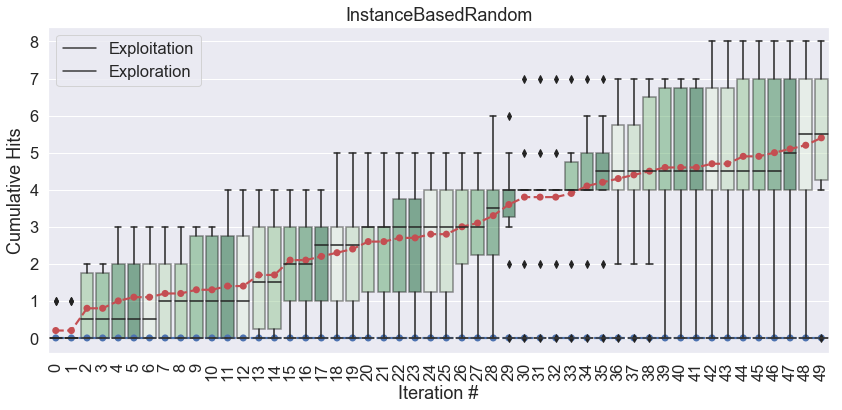

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")
sns.set(font_scale=1.5)
figsize=(14, 6)

plot_max_min_runs = False
sorted_hid_list = sdf.index.tolist()
iter_df = cdf[cdf['iter_num'] != 9999]
for hid in sorted_hid_list:
    temp_df = iter_df[iter_df['hs_id'] == hid]
    run_list = []
    for rid in temp_df['rf_id'].unique():
        run_df = temp_df[temp_df['rf_id'] == rid].sort_values('iter_num')
        run_df['exploit_cumsum'] = run_df['exploitation_hits'].cumsum()
        run_df['explore_cumsum'] = run_df['exploration_hits'].cumsum()

        run_list.append(run_df)

    run_df = pd.concat(run_list)

    plt.figure(figsize=figsize)
    
    # exploitation
    sns.boxplot(data=run_df, x='iter_num', y='exploit_cumsum', palette=sns.color_palette("Purples"), boxprops=dict(alpha=1.0))
    sns.pointplot(data=run_df, x='iter_num', y='exploit_cumsum',  
                  linestyles='--', scale=0.8, color='b', errwidth=0, capsize=0)
    
    # exploration
    sns.boxplot(data=run_df, x='iter_num', y='explore_cumsum', palette=sns.color_palette("Greens"), boxprops=dict(alpha=.5))
    sns.pointplot(data=run_df, x='iter_num', y='explore_cumsum',  
                  linestyles='--', scale=0.8, color='r', errwidth=0, capsize=0)
    
    if plot_max_min_runs:
        # min-max exploitation
        x = run_df[run_df['iter_num'] == 49]
        max_hits = x.iloc[np.argmax(x['total_hits'].values),:]['rf_id']
        max_run = run_df[run_df['rf_id'] == max_hits]
        min_hits = x.iloc[np.argmin(x['total_hits'].values),:]['rf_id']
        min_run = run_df[run_df['rf_id'] == min_hits]

        sns.pointplot(data=max_run, x='iter_num', y='exploit_cumsum',  
                      linestyles='--', scale=0.8, color='b', errwidth=0, capsize=0)
        sns.pointplot(data=max_run, x='iter_num', y='exploit_cumsum',  
                      linestyles='--', scale=0.8, color='b', errwidth=0, capsize=0)

        # min-max exploration
        sns.pointplot(data=max_run, x='iter_num', y='explore_cumsum',  
                      linestyles='--', scale=0.8, color='r', errwidth=0, capsize=0)
        sns.pointplot(data=min_run, x='iter_num', y='explore_cumsum',  
                      linestyles='--', scale=0.8, color='r', errwidth=0, capsize=0)
    
    plt.xticks(rotation=90)
    plt.xlabel('Iteration #')
    plt.ylabel('Cumulative Hits')
    plt.legend(['Exploitation', 'Exploration'])
    plt.title(hid)
    plt.show()